Use conda 3.6


In [64]:
### Dependencies and Libraries ###
try:
    import numpy
    print('module numpy is installed')
except ModuleNotFoundError:
    !pip install numpy

try:
    import pandas 
    print('module pandas is installed')
except ModuleNotFoundError:
    !pip install pandas

try:
    import matplotlib.pyplot 
    print('module matplotlib is installed')
except ModuleNotFoundError:
    !pip install matplotlib

#usual stuff
import numpy as np
import pandas as pd

# For visualization:
from matplotlib.pyplot import figure, plot, semilogy, grid, legend
%matplotlib inline

module numpy is installed
module pandas is installed
module matplotlib is installed


In [ ]:
#Peak at data
df0 = pd.read_csv('csse_covid_19_daily_reports_us/01-16-2021.csv')
print('Done loading. The first 5 rows:')
df0.head(5)

Done loading. The first 5 rows:


,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2021-01-17 05:30:35,32.3182,-86.9023,420681,6119,221961.0,192601.0,1.0,8579.749693,3509790.0,NaN,1.454546,84000001.0,USA,71581.839151,NaN
1,Alaska,US,2021-01-17 05:30:35,61.3707,-152.4044,51678,229,7165.0,44259.0,2.0,7060.809656,1398649.0,NaN,0.443343,84000002.0,USA,191191.109228,NaN
2,American Samoa,US,2021-01-17 05:30:35,-14.2710,-170.1320,0,0,NaN,0.0,60.0,0.000000,2140.0,NaN,NaN,16.0,ASM,3846.084722,NaN
3,Arizona,US,2021-01-17 05:30:35,33.7298,-111.4312,666901,11248,90640.0,565013.0,4.0,9162.342759,5969026.0,NaN,1.686607,84000004.0,USA,43870.052923,NaN
4,Arkansas,US,2021-01-17 05:30:35,34.9697,-92.3731,270178,4293,240051.0,25834.0,5.0,8952.801441,2261205.0,NaN,1.588952,84000005.0,USA,74928.822415,NaN


In [ ]:
print(type(df0['Last_Update'].loc[0])) # Confirm that these values are strings

# going to have to convert columns to use `datetime` values:
df0['Timestamp'] = pd.to_datetime(df0['Last_Update'])
df0.head(5)

<class 'str'>


,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,Timestamp
0,Alabama,US,2021-01-17 05:30:35,32.3182,-86.9023,420681,6119,221961.0,192601.0,1.0,8579.749693,3509790.0,NaN,1.454546,84000001.0,USA,71581.839151,NaN,2021-01-17 05:30:35
1,Alaska,US,2021-01-17 05:30:35,61.3707,-152.4044,51678,229,7165.0,44259.0,2.0,7060.809656,1398649.0,NaN,0.443343,84000002.0,USA,191191.109228,NaN,2021-01-17 05:30:35
2,American Samoa,US,2021-01-17 05:30:35,-14.2710,-170.1320,0,0,NaN,0.0,60.0,0.000000,2140.0,NaN,NaN,16.0,ASM,3846.084722,NaN,2021-01-17 05:30:35
3,Arizona,US,2021-01-17 05:30:35,33.7298,-111.4312,666901,11248,90640.0,565013.0,4.0,9162.342759,5969026.0,NaN,1.686607,84000004.0,USA,43870.052923,NaN,2021-01-17 05:30:35
4,Arkansas,US,2021-01-17 05:30:35,34.9697,-92.3731,270178,4293,240051.0,25834.0,5.0,8952.801441,2261205.0,NaN,1.588952,84000005.0,USA,74928.822415,NaN,2021-01-17 05:30:35


In [ ]:
#first we need all file names
def get_covid19_daily_filenames(root='csse_covid_19_daily_reports_us/'):
    '''
    Returns a list of file paths corresponding to JHU's
    daily tallies of COVID-19 cases.
    '''
    from os import listdir
    from os.path import isfile
    from re import match
    
    def covid19_filepath(filebase, root):
        return f'{root}{filebase}'
    
    def is_covid19_daily_file(filebase, root):
        file_path = covid19_filepath(filebase, root)
        return isfile(file_path) and match('^\d\d-\d\d-2020.csv$', filebase)
    
    filenames = []
    for b in listdir(root):
        if is_covid19_daily_file(b, root):
            filenames.append(covid19_filepath(b, root))
    return sorted(filenames)

# Demo:
#print(repr(get_covid19_daily_filenames()))

In [24]:
#Load all data function
def load_covid19_daily_data(filenames):
    from pandas import read_csv, concat, to_datetime
    df_list = []
    for filename in filenames:
        df = read_csv(filename).rename(columns={'Province_State': 'Province/State',
                                                'Country_Region': 'Country/Region',
                                                'Last_Update': 'Last Update'})
        df = df[['Province/State', 'Country/Region', 'Confirmed', 'Last Update']]
        df['Last Update'] = to_datetime(df['Last Update'])
        df['Confirmed'] = df['Confirmed'].fillna(0).astype(int)
        df_list.append(df)
    df_combined = concat(df_list)
    df_combined.rename(columns={'Last Update': 'Timestamp'}, inplace=True)
    df_combined.drop_duplicates(inplace=True)
    return df_combined.reset_index(drop=True)


In [25]:
# Merge files into one dataframe
df_covid19 = load_covid19_daily_data(get_covid19_daily_filenames())

print(f'There are {len(df_covid19)} rows in your data frame.')
print('The first five are:')
display(df_covid19.head(5))

print('A random sample of five additional rows:')
df_covid19.sample(5).sort_index()

There are 15314 rows in your data frame.
The first five are:


,Province/State,Country/Region,Confirmed,Timestamp
0,Alabama,US,3667,2020-04-12 23:18:15
1,Alaska,US,272,2020-04-12 23:18:15
2,Arizona,US,3542,2020-04-12 23:18:15
3,Arkansas,US,1280,2020-04-12 23:18:15
4,California,US,22137,2020-04-12 23:18:15


A random sample of five additional rows:


,Province/State,Country/Region,Confirmed,Timestamp
2769,Oklahoma,US,6338,2020-05-30 02:32:55
3375,Diamond Princess,US,49,2020-06-10 04:07:14
6949,Rhode Island,US,19738,2020-08-10 04:35:08
12128,Arkansas,US,120828,2020-11-08 05:30:26
14414,Mississippi,US,185643,2020-12-17 05:30:43


In [28]:
#New Mexico exampes
is_nm = (df_covid19['Province/State'] == 'New Mexico')
df_covid19[is_us].sample(5)

,Province/State,Country/Region,Confirmed,Timestamp
8969,New Mexico,US,26761,2020-09-14 04:30:37
10303,New Mexico,US,30947,2020-10-07 04:30:35
12275,New Mexico,US,56289,2020-11-10 05:42:01
10651,New Mexico,US,33362,2020-10-13 04:30:36
378,New Mexico,US,1798,2020-04-18 22:32:47


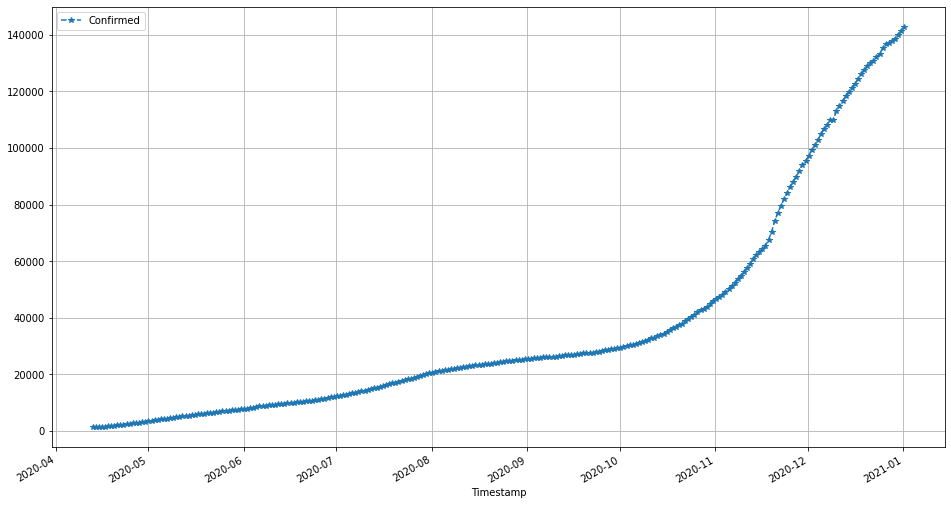

In [29]:
#plot of NM cases
df_covid19[is_nm] \
    .sort_values(by='Timestamp') \
    .plot(x='Timestamp', y='Confirmed', figsize=(16, 9), style='*--')
grid()

In [35]:
#state by state data
STATES = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
STATE_NAMES = pd.DataFrame(STATES.items(), columns=['Name', 'Abbrv'])
def get_us_states__3(df):
    US = df[df["Country/Region"] == 'US']
    states = US[US["Province/State"].isin(STATE_NAMES.Name)]
    states = states.join(STATE_NAMES.set_index('Name'), on='Province/State')
    states['ST'] = states.Abbrv
    return states[['Timestamp', 'Confirmed', 'ST']]

 #test it  
get_us_states__3(df_covid19)


,Timestamp,Confirmed,ST
0,2020-04-12 23:18:15,3667,AL
1,2020-04-12 23:18:15,272,AK
2,2020-04-12 23:18:15,3542,AZ
3,2020-04-12 23:18:15,1280,AR
4,2020-04-12 23:18:15,22137,CA
...,...,...,...
15309,2021-01-01 05:30:27,349584,VA
15310,2021-01-01 05:30:27,246752,WA
15311,2021-01-01 05:30:27,85334,WV
15312,2021-01-01 05:30:27,520438,WI


In [40]:
#Rank confirmed cases
df_covid19_us = get_us_states__3(df_covid19)

def rank_states_by_cases(df):
    return df.groupby("ST").max().sort_values(by="Confirmed", ascending=False).index.tolist()

In [44]:
#Test ranking
covid19_rankings = rank_states_by_cases(df_covid19_us)
print(f"Ranking:\n==> {repr(covid19_rankings)}\n")

Ranking:
==> ['CA', 'TX', 'FL', 'NY', 'IL', 'OH', 'GA', 'PA', 'TN', 'NC', 'NJ', 'MI', 'WI', 'AZ', 'IN', 'MO', 'MN', 'MA', 'AL', 'VA', 'CO', 'LA', 'SC', 'OK', 'IA', 'MD', 'UT', 'KY', 'WA', 'KS', 'AR', 'NV', 'MS', 'CT', 'NE', 'NM', 'ID', 'OR', 'SD', 'ND', 'RI', 'WV', 'MT', 'PR', 'DE', 'AK', 'NH', 'WY', 'DC', 'ME', 'HI', 'VT', 'GU', 'MP', 'AS']



Plot top n number of states by confirmed cases. The y-axis uses a logarithmic scale in this plot.

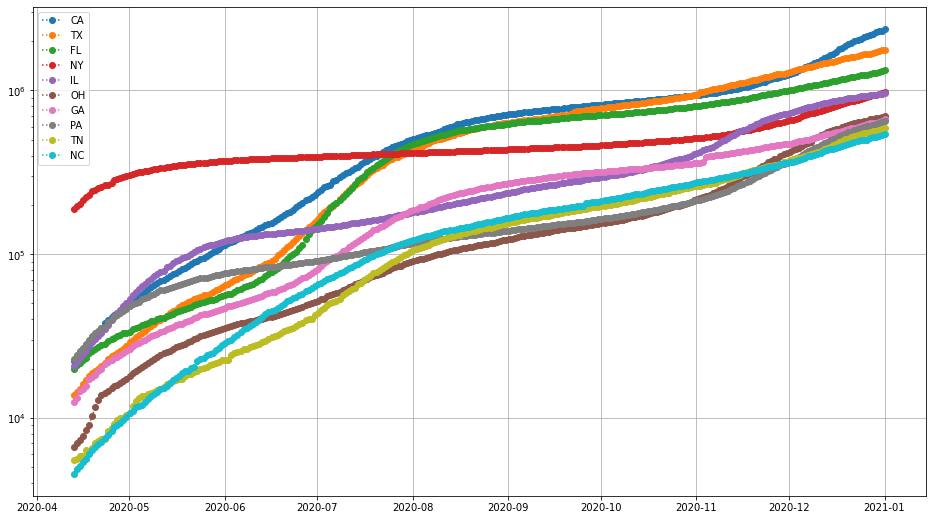

In [47]:
def viz_by_state(col, df, states, figsize=(16, 9), logy=False):
    from matplotlib.pyplot import figure, plot, semilogy, legend, grid
    figure(figsize=figsize)
    plotter = plot if not logy else semilogy
    for s in states:
        df0 = df[df["ST"] == s].sort_values(by="Timestamp")
        plotter(df0["Timestamp"], df0[col], "o:")
    legend(states)
    grid()
    
TOP_K = 10
viz_by_state("Confirmed", df_covid19_us, covid19_rankings[:TOP_K], logy=True)

There is likely some days where data is missing for some of the states which I would have to find away to fill in (assuming I had more time). They would show up on graph above at 0.

In [61]:
#Rolling averages
def daily_windowed_avg(df, days):
    df_avg = df.sort_values(by="Timestamp") \
               .set_index("Timestamp") \
               .groupby("ST") \
               .rolling(days) \
               .mean() \
               .reset_index() \
               .rename(columns={"Confirmed": "Avg"}) \
               .dropna()
    return df_avg.merge(df, on=["ST", "Timestamp"])



# Demo:
print('"AK" and "GA"')
is_ak_ga_before = df_covid19_us["ST"].isin(["AK", "GA"])
display(df_covid19_us[is_ak_ga_before])

print('(days=3)')
df_us_daily_avg = daily_windowed_avg(df_covid19_us, 3)
is_ak_ga_after = df_us_daily_avg["ST"].isin(["AK", "GA"])
display(df_us_daily_avg[is_ak_ga_after])


"AK" and "GA"


,Timestamp,Confirmed,ST
1,2020-04-12 23:18:15,272,AK
11,2020-04-12 23:18:15,12452,GA
60,2020-04-13 23:07:54,277,AK
70,2020-04-13 23:07:54,13315,GA
117,2020-04-14 23:33:31,285,AK
...,...,...,...
15152,2020-12-30 05:30:45,645690,GA
15199,2020-12-31 05:30:27,46504,AK
15210,2020-12-31 05:30:27,654743,GA
15257,2021-01-01 05:30:27,47014,AK


(days=3)


,ST,Timestamp,Avg,Confirmed
0,AK,2020-04-14 23:33:31,278.000000,285
1,AK,2020-04-15 22:56:51,285.000000,293
2,AK,2020-04-16 23:30:51,292.666667,300
3,AK,2020-04-17 23:30:52,300.666667,309
4,AK,2020-04-18 22:32:47,307.666667,314
...,...,...,...,...
3130,GA,2020-12-28 05:30:44,628572.333333,632299
3131,GA,2020-12-29 05:30:33,632442.333333,636240
3132,GA,2020-12-30 05:30:45,638076.333333,645690
3133,GA,2020-12-31 05:30:27,645557.666667,654743


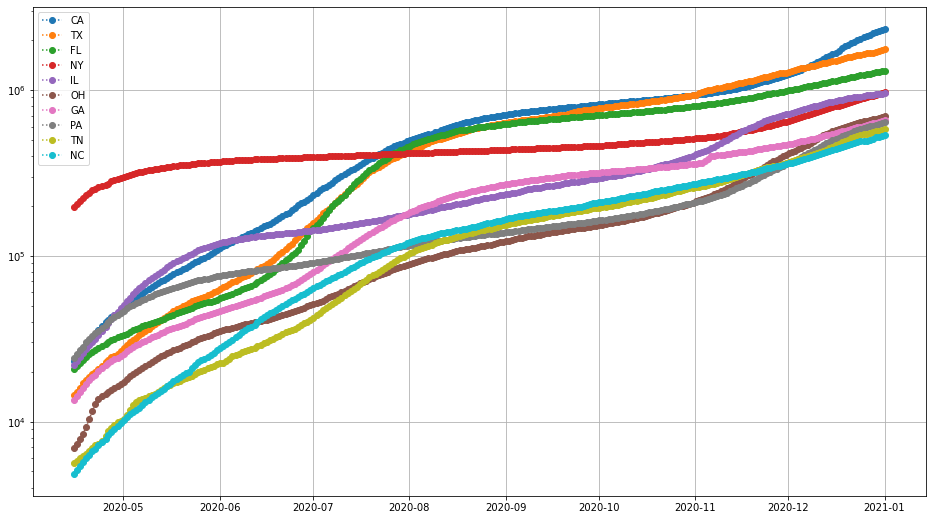

In [62]:
#daily avg plot (looks similar with this much data)
viz_by_state("Avg", df_us_daily_avg, covid19_rankings[:TOP_K], logy=True)